Set up for better resolution

In [0]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina', quality=100)

In [0]:
# party colours
party_colour_map = {
		"Conservative" : "#0087dc",
    "Labour" : "#d50000",
    "Scottish National Party" : "#FFF95D",
    "Liberal Democrat" : "#FDBB30",
    "Plaid Cymru" : "#3F8428",
    "Green" : "#008066",
    "Speaker" : "#808080"
	}

party_colour_map_19 = {
		"CON" : "#0087dc",
    "LAB" : "#d50000",
    "SNP" : "#FFF95D",
    "LIBDEM" : "#FDBB30",
    "PC" : "#3F8428",
    "GRN" : "#008066",
    "OTHER" : "#808080"
	}

Get the data

In [0]:
import pandas as pd

historical_data_url = 'https://bitbucket.org/stephendl/electiondata/raw/da94aa3e5fd31418b7e1b76b86037a0709ecedd3/data.csv'
historical_data = pd.read_csv(historical_data_url)

ge19_url = 'https://bitbucket.org/stephendl/electiondata/raw/d505209f94e5e9fa099bf1640dafc48282c4c051/GE19Results.csv'
ge19_results = pd.read_csv(ge19_url)

# create a dataframe with old and current data
all_data = historical_data.set_index('ONSConstID').join(ge19_results.set_index('ONSConstID'), lsuffix='_historical', rsuffix='_ge19')


In [0]:
# clean up
# all_data_without_na = all_data.dropna(subset=['Con17', 'Lab17', 'LD17', 'CON_pc', 'LAB_pc', 'LIBDEM_pc'])

# remove the speaker as it looks odd
all_data_without_speaker = all_data.drop(["E14000637"], axis=0)

#pick out just england
is_england = all_data_without_speaker["Country"] == 'England'
england = all_data_without_speaker[is_england]

# what data will we plot
data_to_plot = all_data_without_speaker

In [0]:
pip install python-ternary

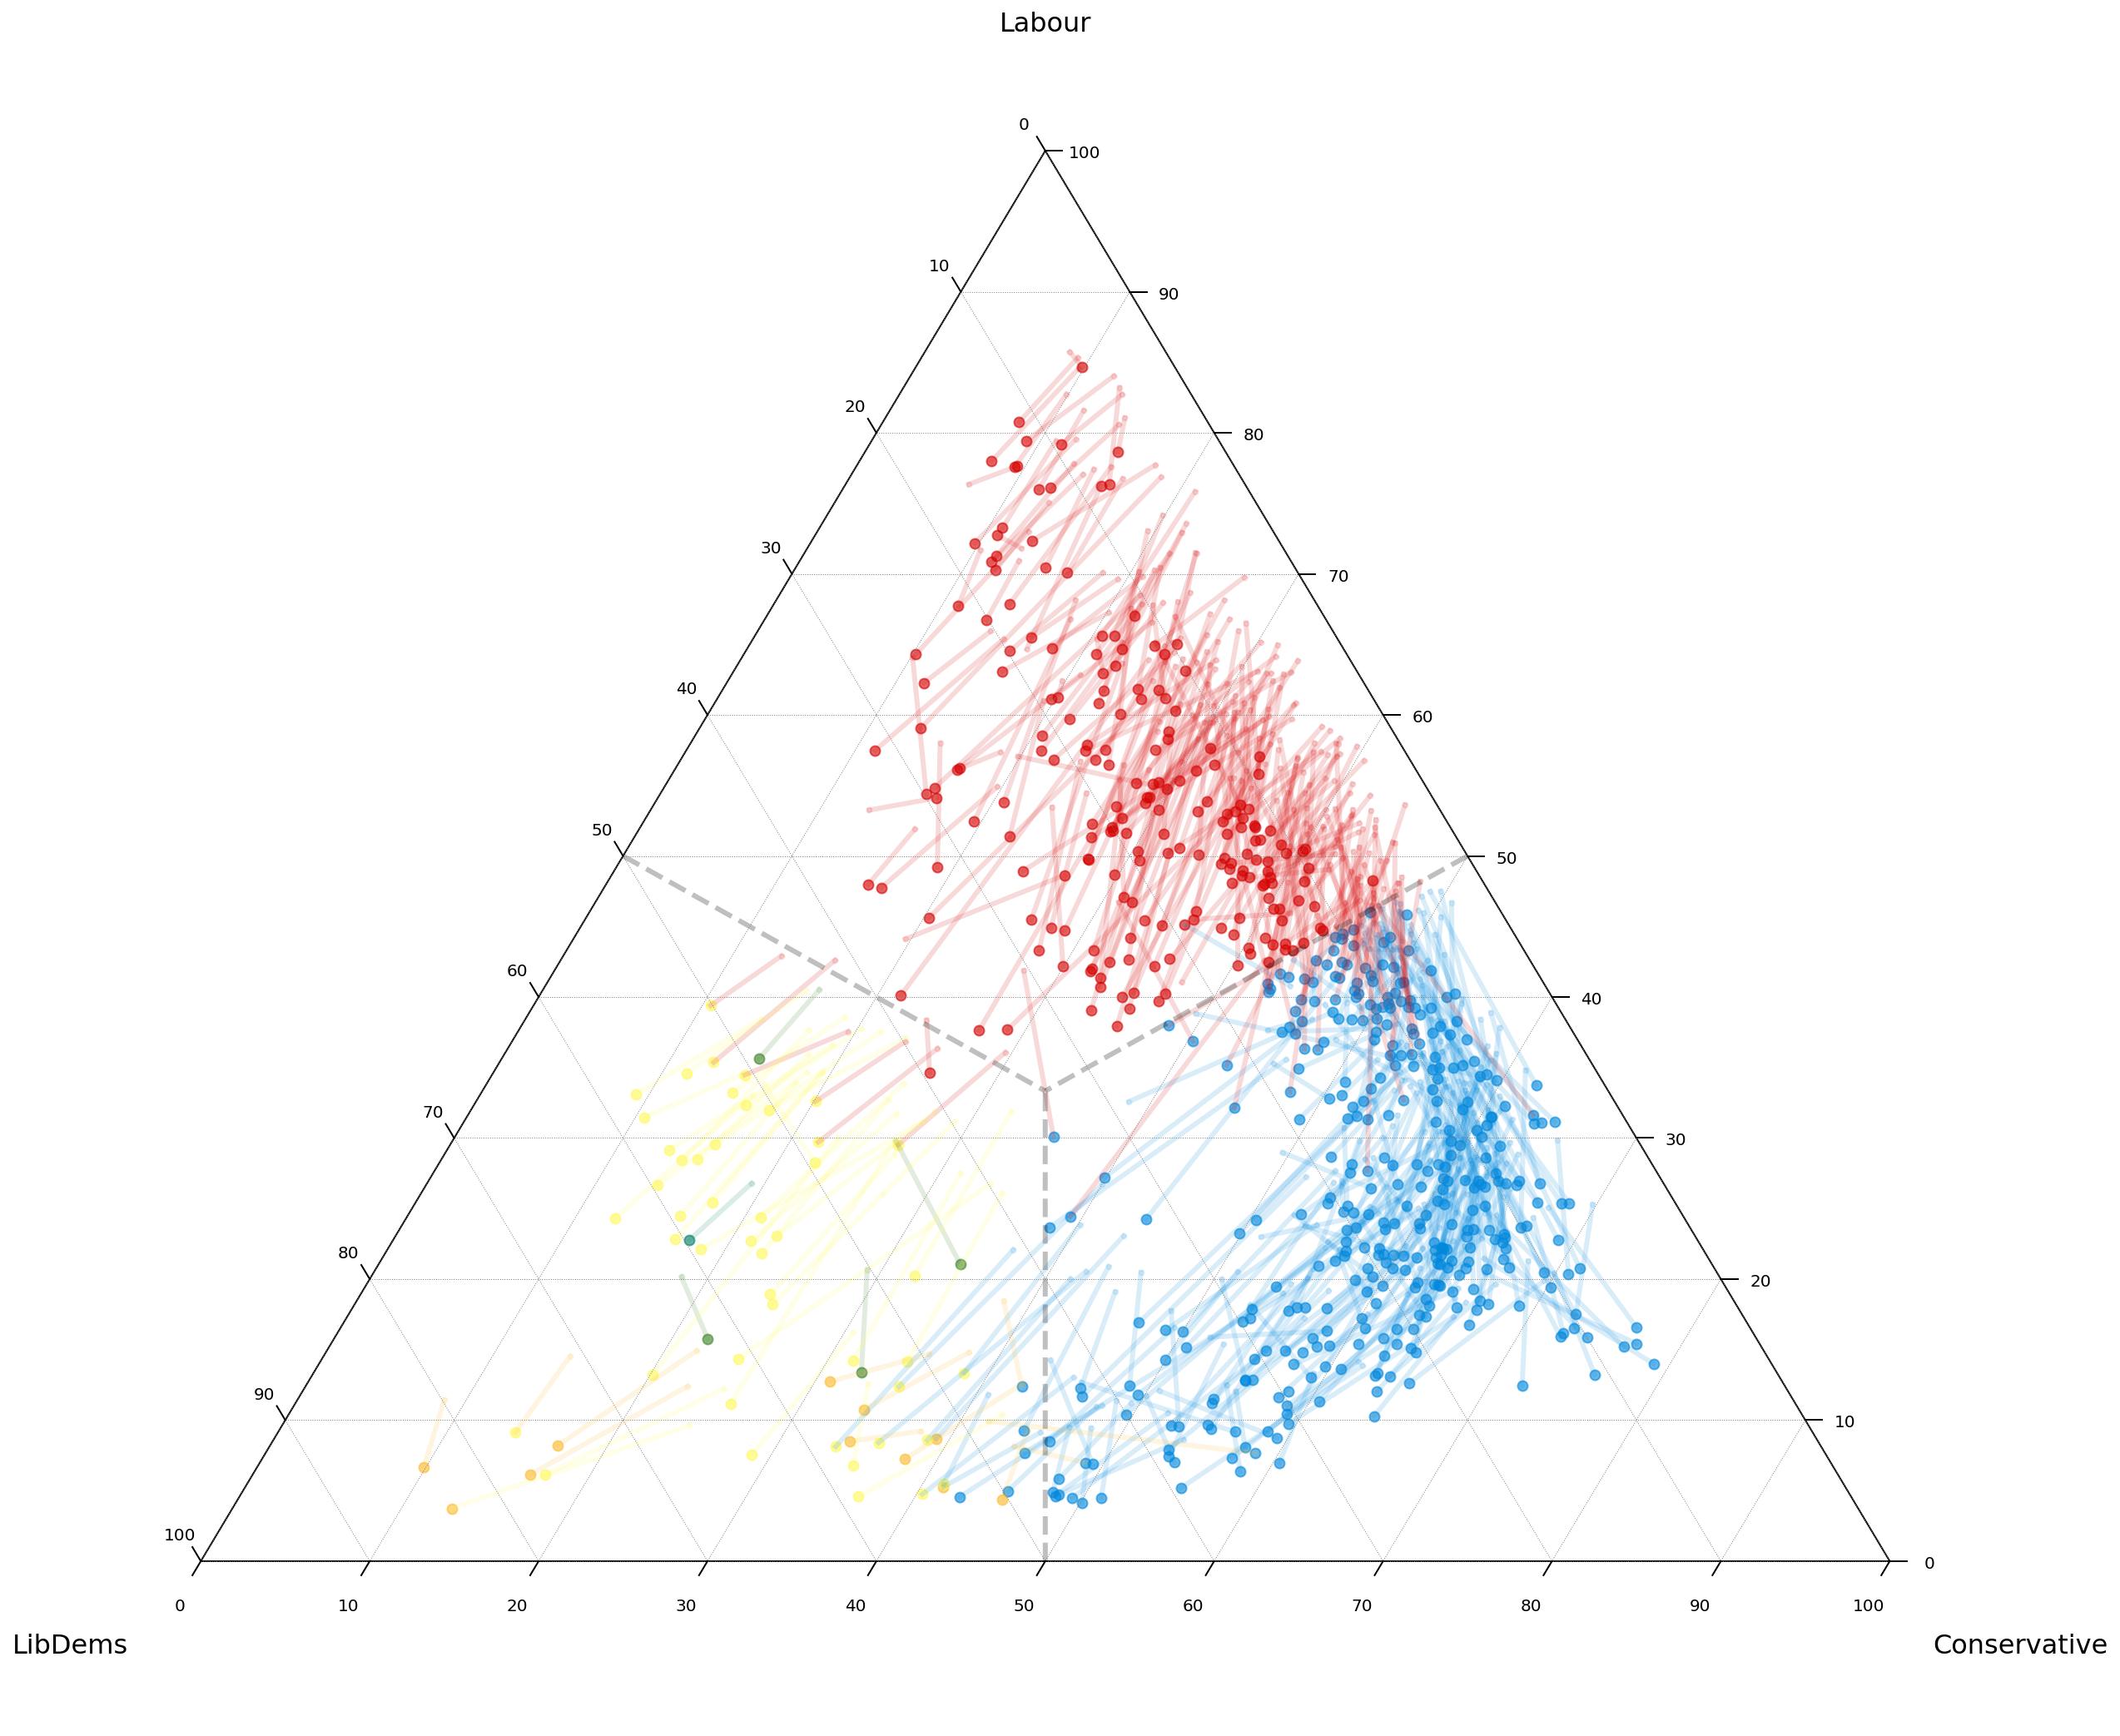

In [6]:
import ternary
import numpy as np

cols = ['Con17', 'Lab17', 'LD17']
cols_19 = ['CON_pc', 'LAB_pc', 'LIBDEM_pc']
all_cols = cols + cols_19

# set up
fig, tax = ternary.figure(scale=100)
fig.set_size_inches(20, 18)

# Plot the points in groups.
for name, group in data_to_plot.groupby('Winner17'):
    points = group[cols].values
    tax.scatter(points, marker='.', label=name, color=party_colour_map[name], alpha = 0.1)

    all_points = group[all_cols].values
    for point in all_points:
      # print(point[3], point[4], point[5])
      tax.line(
          (point[0], point[1], point[2]), 
          (point[3], point[4], point[5]), 
          linewidth=3, 
          color=party_colour_map[name], 
          alpha=0.15, 
          linestyle="-"
      )

for name, group in data_to_plot.groupby('Winner19'):
    points_19 = group[cols_19].values
    tax.scatter(points_19, marker='o', label=name, color=party_colour_map_19[name], alpha = 0.6)

# Draw some lines.
p1, p2 = (0, 50, 50), (33.33, 33.33, 33.33)
tax.line(p1, p2, linewidth=3, color='k', alpha=0.25, linestyle="--")

p1, p2 = (50, 0, 50), (33.33, 33.33, 33.33)
tax.line(p1, p2, linewidth=3, color='k', alpha=0.25, linestyle="--")

p1, p2 = (50, 50, 0), (33.33, 33.33, 33.33)
tax.line(p1, p2, linewidth=3, color='k', alpha=0.25, linestyle="--")

# Corner labels.
fontsize = 16
offset = 0.1
tax.top_corner_label("Labour", fontsize=fontsize, offset=0.2)
tax.left_corner_label("LibDems", fontsize=fontsize, offset=offset)
tax.right_corner_label("Conservative", fontsize=fontsize, offset=offset)

# decoration
# tax.legend(title="Winner")
tax.boundary(linewidth=1)
tax.gridlines(multiple=10, color="gray")
tax.ticks(axis='lbr', linewidth=1, multiple=10)
tax.get_axes().axis('off')

tax.show()